## House Prices - Prática do AceleraDev Data Science

Base de dados: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Avaliação do *dataset*

In [2]:
# leitura do dataset
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
# consistência das colunas
cons = pd.DataFrame({'coluna': train.columns,
                     'tipo': train.dtypes,
                     'missing': train.isna().sum(),
                     'size': train.shape[0],
                     'unicos': train.nunique()})
cons

,coluna,tipo,missing,size,unicos
Id,Id,int64,0,1460,1460
MSSubClass,MSSubClass,int64,0,1460,15
MSZoning,MSZoning,object,0,1460,5
LotFrontage,LotFrontage,float64,259,1460,110
LotArea,LotArea,int64,0,1460,1073
...,...,...,...,...,...
MoSold,MoSold,int64,0,1460,12
YrSold,YrSold,int64,0,1460,5
SaleType,SaleType,object,0,1460,9
SaleCondition,SaleCondition,object,0,1460,6


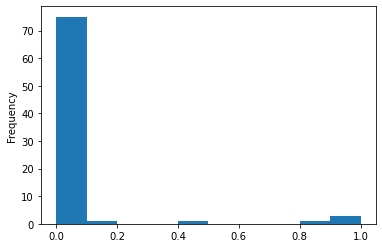

In [7]:
# percentual de missings
cons['percent_missing'] = round(cons['missing']/cons['size'],2)

cons.percent_missing.plot.hist(bins=10)

In [11]:
# colunas sem missings
print("Colunas sem missing data:", cons[cons.percent_missing == 0].shape[0])
print("Percentual sem missing data:", (cons[cons.percent_missing == 0].shape[0]/cons.shape[0])*100)

Colunas sem missing data: 63
Percentual sem missing data: 77.77777777777779


In [14]:
# tipo das variáveis completas
cons[cons.percent_missing == 0]['tipo'].value_counts()

int64     35
object    28
Name: tipo, dtype: int64

In [16]:
# cria marcação de variável completa
cons['completa'] = ['completa' if x==0 else 'tem missing' for x in cons['percent_missing']]

In [18]:
# mantenho apenas as variáveis completas
df = train[list(cons[cons.completa == 'completa']['coluna'])]
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [19]:
df.shape

(1460, 63)

### Exploração dos dados

In [28]:
# lista as colunas numericas
cols_numericas = list(cons[(cons.tipo != 'object') & (cons.completa == 'completa')]['coluna'])

Id


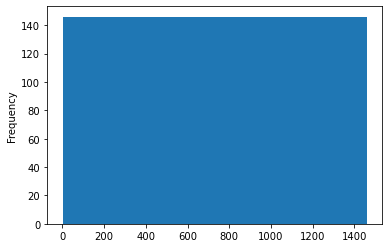

MSSubClass


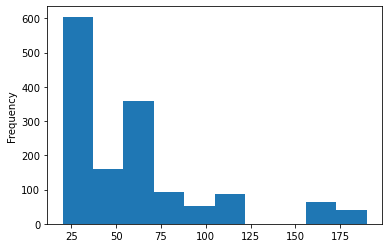

LotArea


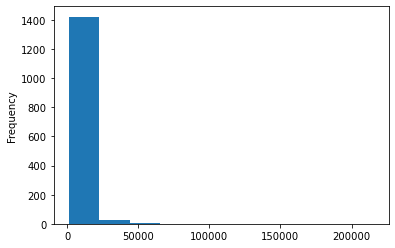

OverallQual


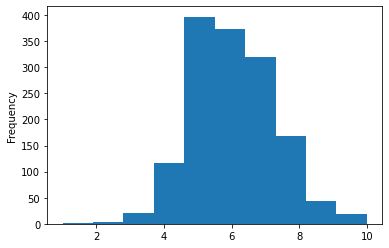

OverallCond


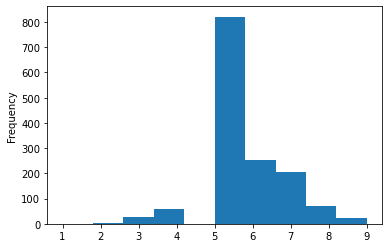

YearBuilt


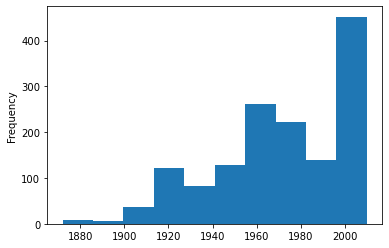

YearRemodAdd


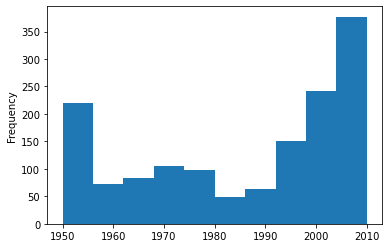

BsmtFinSF1


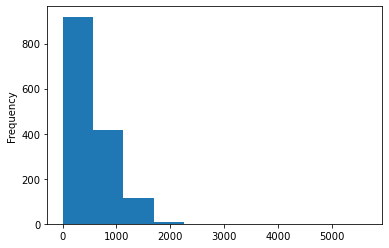

BsmtFinSF2


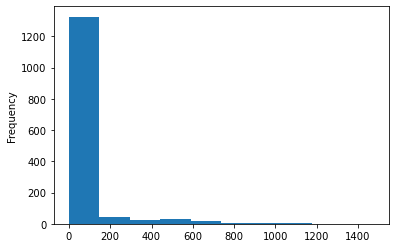

BsmtUnfSF


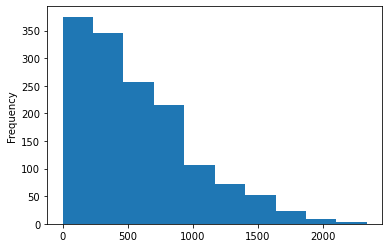

TotalBsmtSF


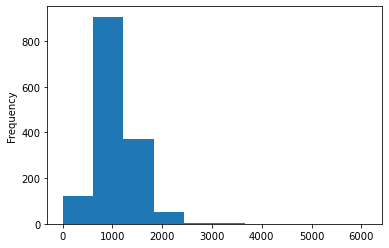

1stFlrSF


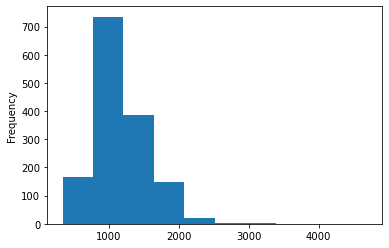

2ndFlrSF


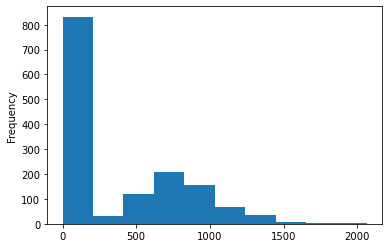

LowQualFinSF


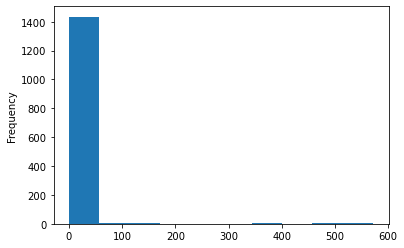

GrLivArea


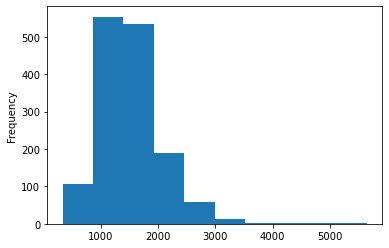

BsmtFullBath


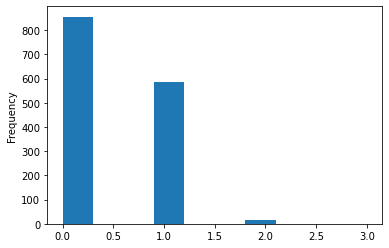

BsmtHalfBath


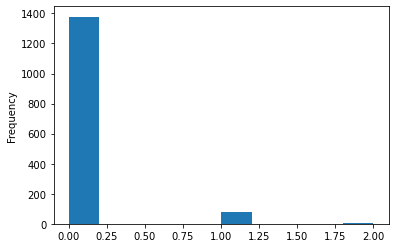

FullBath


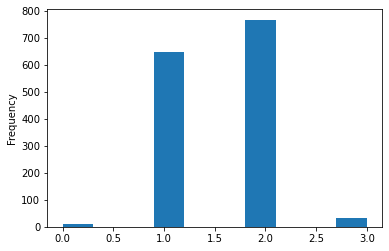

HalfBath


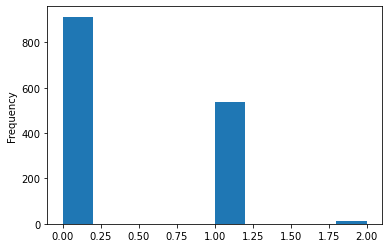

BedroomAbvGr


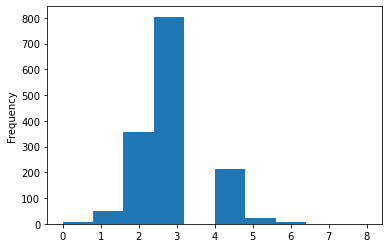

KitchenAbvGr


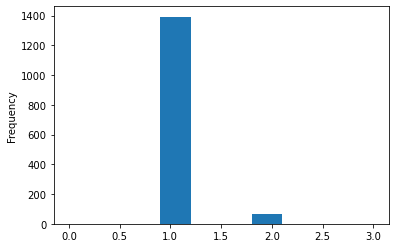

TotRmsAbvGrd


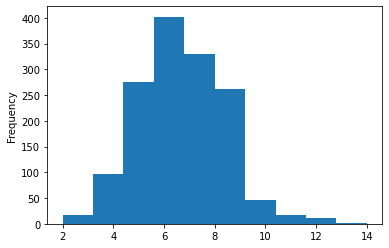

Fireplaces


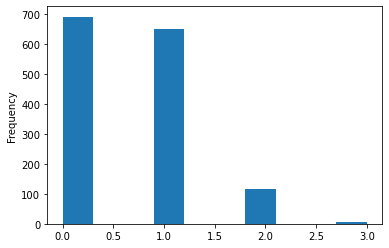

GarageCars


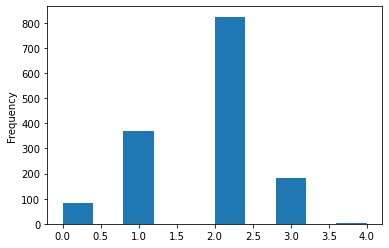

GarageArea


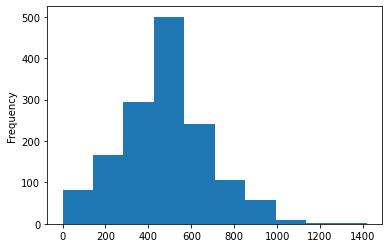

WoodDeckSF


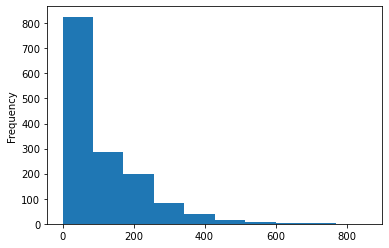

OpenPorchSF


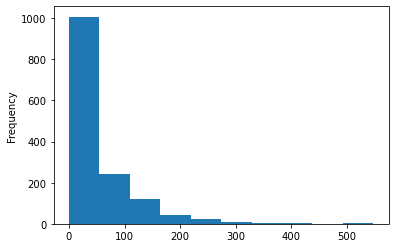

EnclosedPorch


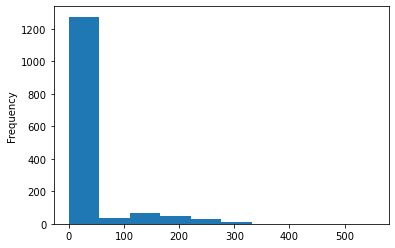

3SsnPorch


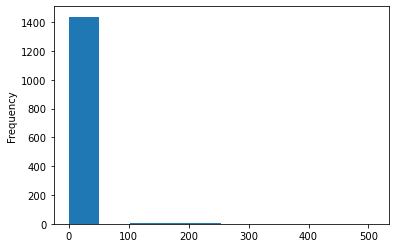

ScreenPorch


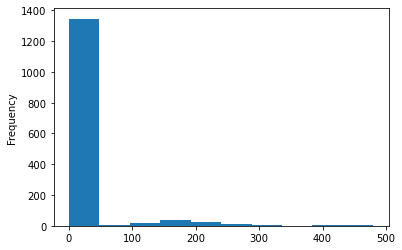

PoolArea


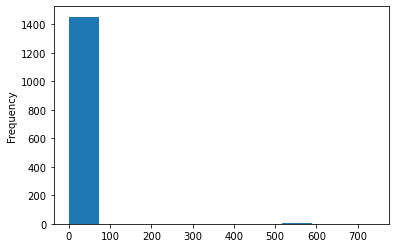

MiscVal


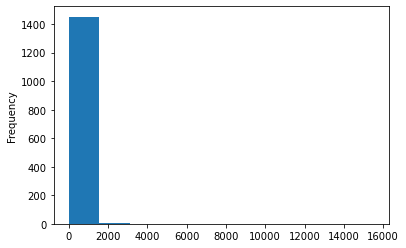

MoSold


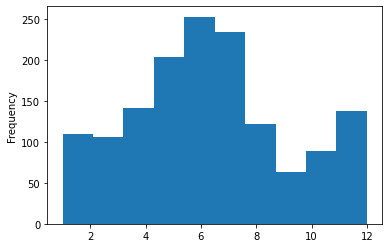

YrSold


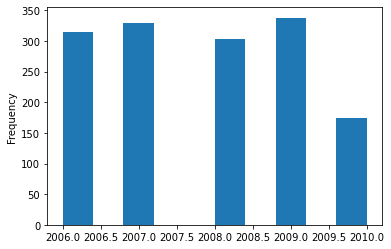

SalePrice


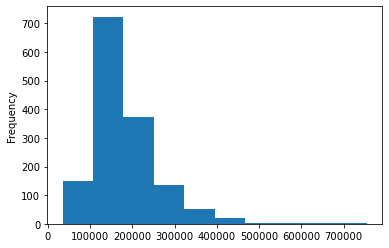

In [29]:
# histograma de todas as variáveis numéricas
for coluna in cols_numericas:
    print(coluna)
    df[coluna].plot.hist(bins=10)
    plt.show()

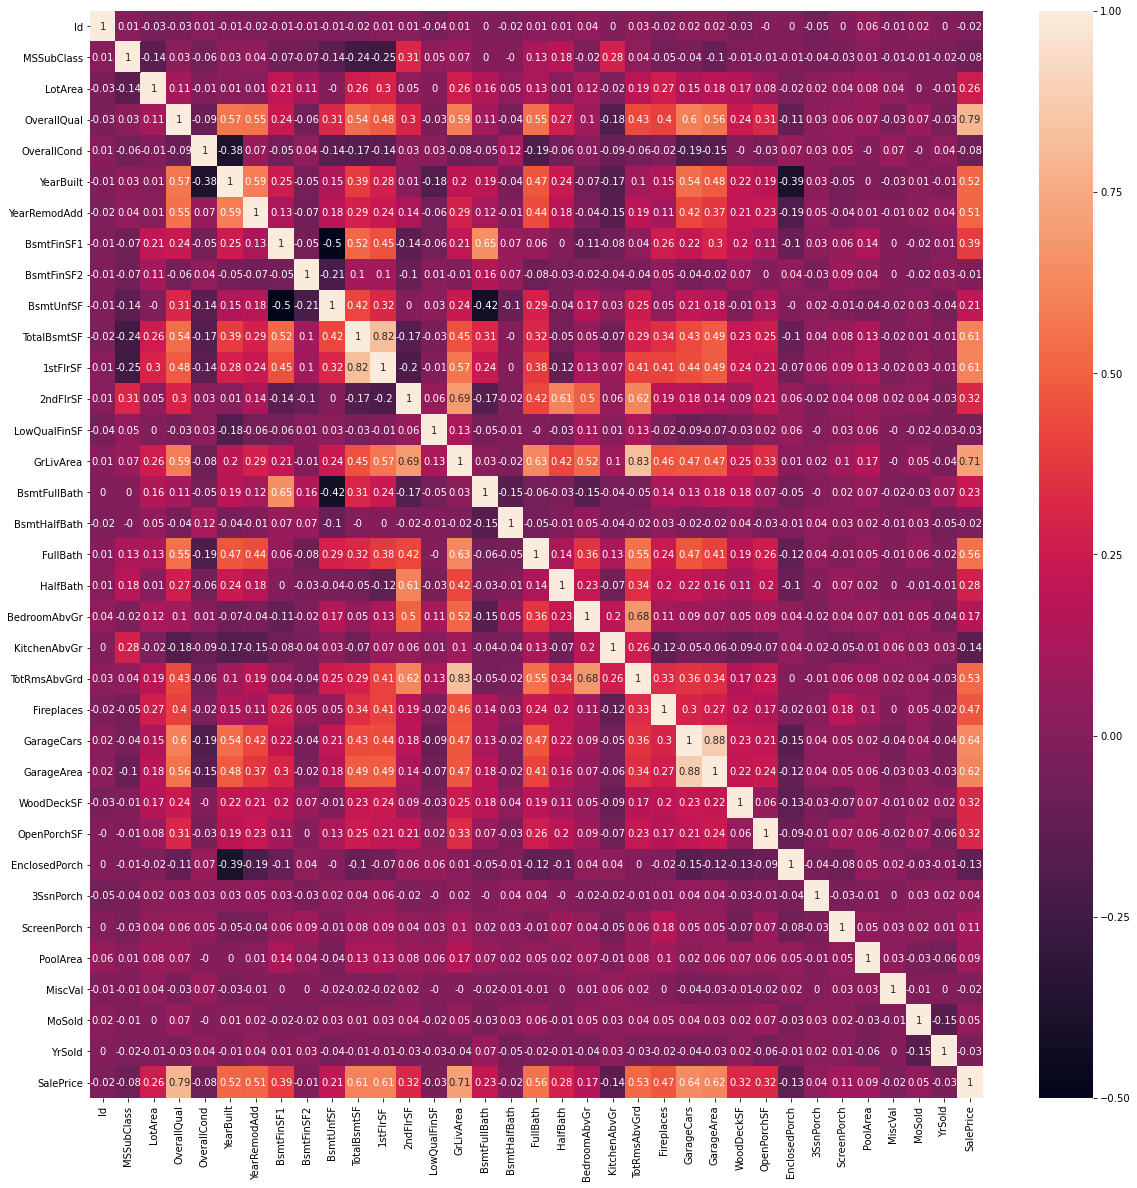

In [30]:
# correlação entre as variáveis
plt.figure(figsize=(20,20))
sns.heatmap(df[cols_numericas].corr().round(2), annot=True)

### Analisando as *features* com yellowbrick

In [31]:
pip install yellowbrick

In [33]:
# remove a coluna Id das colunas numéricas
cols_numericas.remove('Id')
df = df[cols_numericas]

In [35]:
y_train = df['SalePrice']
x_train = df.drop(columns = 'SalePrice')

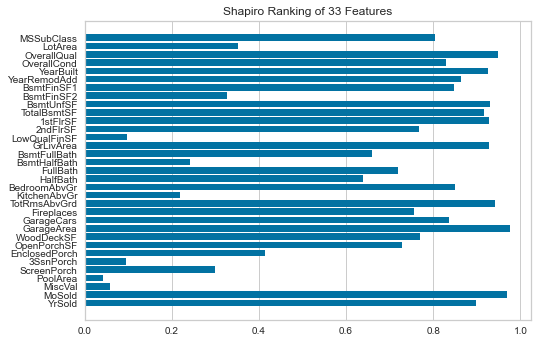

In [38]:
# vizualização do ranking de features
from yellowbrick.features import Rank1D

vis = Rank1D(algorithm='Shapiro')
vis.fit(x_train, y_train)
vis.transform(x_train)
vis.show()

Pesquisar melhor pra entender o que esse gráfico está mostrando.

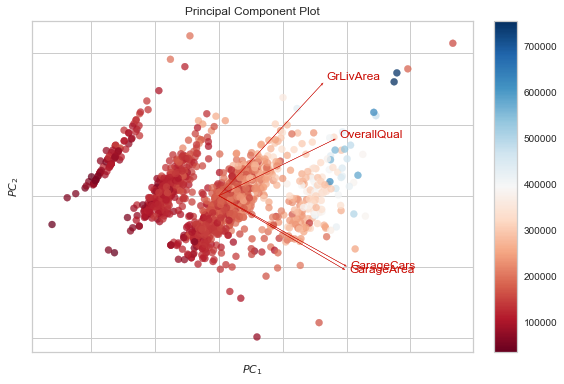

In [41]:
# PCA num subset de variáveis correlacionadas
correl = ['GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual']

from yellowbrick.features import PCA

pca = PCA(scale=True, proj_features=True, projection=2)
pca.fit_transform(x_train[correl], y_train)
pca.show()

Senti falta de visualizar a variância explicada...

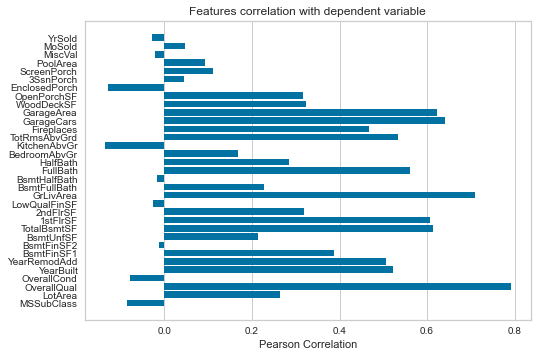

In [44]:
# outra visualização (muito melhor!) para correlação de features
from yellowbrick.target import FeatureCorrelation

features = list(x_train.columns)

corr = FeatureCorrelation(labels=features)
corr.fit(x_train, y_train)
corr.show()

Aqui dá pra ver claramente quais features tem relação linear mais forte com a variável resposta.

### Treino do modelo

In [45]:
pip install sklearn


  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=37654fc8a6f8775d76eb9f51b2c05bcdab0c6e382eb2838638aaaabd9a5b81a4
  Stored in directory: C:\Users\jessi\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
# cria um objeto de regressão linear
reg = LinearRegression()

In [48]:
# ajusta o modelo
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
# lê os dados de teste
x_test = pd.read_csv('test.csv')[x_train.columns]
y_test = pd.read_csv('sample_submission.csv')['SalePrice']

In [51]:
# preenche os NAs dos dados de teste com a média
x_test = x_test.fillna(df[x_train.columns].mean())

In [53]:
# faz as predições
y_pred = reg.predict(x_test)

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
erro_norm = mean_squared_error(y_pred=y_pred, y_true=y_test)

In [57]:
print('Erro do modelo linear:', round(erro_norm, 1))

Erro do modelo linear: 4647194215.3


[Text(0, 0.5, 'Real'), Text(0.5, 0, 'Predito')]

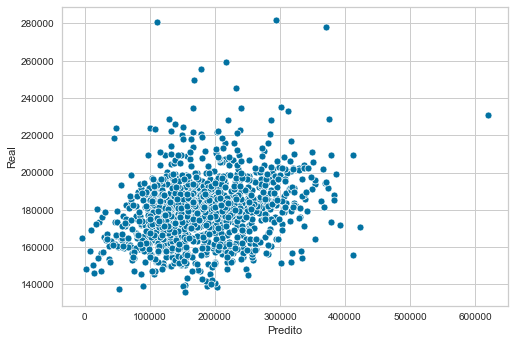

In [61]:
# previsto x real
ax = sns.scatterplot(y_pred, y_test)
ax.set(xlabel='Predito', ylabel='Real')

Conclusão: O modelo é muito ruim.

### Aplicando *feature selection*

In [62]:
from sklearn.feature_selection import RFE

In [63]:
rfe = RFE(reg)

In [64]:
rfe.fit(x_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=None, step=1, verbose=0)

In [65]:
pd.DataFrame({'coluna': x_train.columns,
              'bool': rfe.get_support(),
              'coeficiente': pd.Series(reg.coef_)})

,coluna,bool,coeficiente
0,MSSubClass,True,-162.672852
1,LotArea,False,0.396228
2,OverallQual,True,17905.067194
3,OverallCond,True,4418.794796
4,YearBuilt,True,346.653503
5,YearRemodAdd,True,137.073924
6,BsmtFinSF1,False,11.833598
7,BsmtFinSF2,False,-2.728260
8,BsmtUnfSF,False,0.787735
9,TotalBsmtSF,False,9.893072


As variáveis com a coluna `bool` igual a `True` foram selecionadas no *Recursive Feature Elimination* (RFE). Da pra ver que são as colunas que têm os maiores coeficientes absolutos.

In [69]:
# faz a transformação do dataset de acordo com a decisão do algoritmo
x_train_important = rfe.transform(x_train)
x_test_important = rfe.transform(x_test)

In [70]:
reg.fit(x_train_important, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
y_pred_important = reg.predict(x_test_important)

In [72]:
erro_important = mean_squared_error(y_pred=y_pred_important, y_true=y_test)

In [74]:
print('Erro do modelo linear:', round(erro_norm, 1))
print('Erro do modelo após feature selection:',round(erro_important,1))

Erro do modelo linear: 4647194215.3
Erro do modelo após feature selection: 4628516097.9


In [75]:
erro_important < erro_norm

True

[Text(0, 0.5, 'Real'), Text(0.5, 0, 'Predito')]

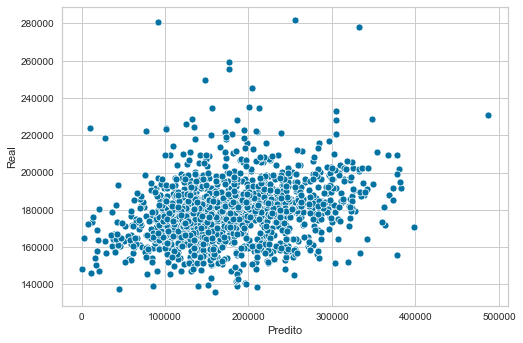

In [76]:
# previsto x real
ax = sns.scatterplot(y_pred_important, y_test)
ax.set(xlabel='Predito', ylabel='Real')

O modelo ainda é ruim, mas deu uma melhoradinha!

### Feature selection no yellowbrick

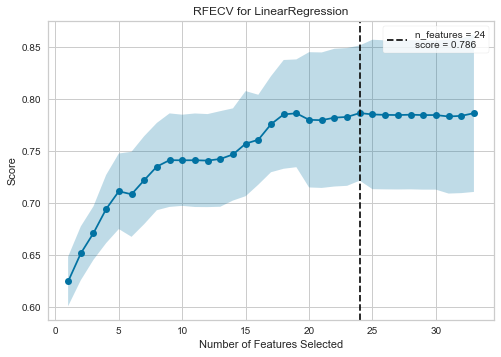

In [81]:
from yellowbrick.model_selection import RFECV

rfecv = RFECV(reg, cv=5)
rfecv.fit(x_train, y_train)
rfecv.show()

O método parece indicar que o número ótimo de features é 24, dentre as features que temos no *dataset*.

In [84]:
print('Número de features no RFE do sklearn:', sum(rfe.get_support()))

Número de features no RFE do sklearn: 16


Ler um pouco mais sobre isso também!

### Aplicando PCA nos dados

In [85]:
from sklearn.decomposition import PCA

pca = PCA(0.95) # quero 95% da variância explicada
pca.fit(x_train)
pca.explained_variance_ratio_

array([0.98511677])

Com as *principal components* criadas, tenho 98% da variância explicada.

In [86]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [87]:
reg = LinearRegression()
reg.fit(x_train_pca, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
y_pred_pca = reg.predict(x_test_pca)

In [90]:
erro_pca = mean_squared_error(y_pred=y_pred_pca, y_true=y_test)

In [91]:
print('Erro do modelo linear:', round(erro_norm,1))
print('Erro do modelo após feature selection:',round(erro_important,1))
print('Erro do modelo após PCA:', round(erro_pca,1))

Erro do modelo linear: 4647194215.3
Erro do modelo após feature selection: 4628516097.9
Erro do modelo após PCA: 134744447.4


In [92]:
erro_pca/erro_norm

0.02899479582256319

O erro do modelo após PCA é menor do que 3% do erro do modelo baseline (o primeiro que ajustamos).

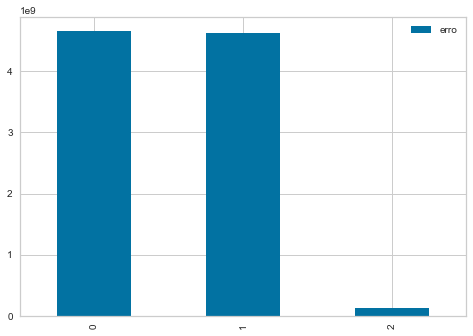

In [93]:
pd.DataFrame({'erro': [erro_norm, erro_important, erro_pca]}).plot(kind='bar')